In [1]:
library(stringr)
library(plyr) 
library(phia)
library(data.table) 
library(ARTool)
library(heplots) 
library(ggplot2)
library(psych)
 

percent <- function(x, digits = 2, format = "f", ...) {
  nums <- vapply(df, is.numeric, FUN.VALUE = logical(1))
  
  df[,nums] <- as.factor(paste0(100 * round(df[,nums], digits = digits), "%"))
  (df)
}

round_df <- function(df, digits = 2) {
  nums <- vapply(df, is.numeric, FUN.VALUE = logical(1))
  
  df[,nums] <- round(df[,nums], digits = digits)
  
  (df)
}

Loading required package: car
Loading required package: carData

Attaching package: ‘psych’

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha

The following object is masked from ‘package:car’:

    logit



In [2]:
data <- read.csv("./data/trials.csv", header=T, sep = ",", dec = ".")
user <- read.csv("./data/users.csv", header=T, sep = ",", dec = ".")

user$userID <- as.factor(user$userID)

data <- data[data$condition!=5,]

data_tmp <- data.frame(str_split_fixed(as.character(data$values), ";", 67))
df <- data.frame(matrix(NA, nrow = nrow(data), ncol = 1))

for(i in names(data_tmp)){
    df_tmp <- data.frame(str_split_fixed(data_tmp[,i], ":", 2)[,2])
    colnames(df_tmp) <- c(str_split_fixed(data_tmp[,i], ":", 2)[1,1])
    
    if(colnames(df_tmp)=="FINAL_03"||colnames(df_tmp)=="FINAL_04") {
        df_tmp <- df_tmp
    } else {
        df_tmp <- as.data.frame(sapply(sapply(df_tmp, as.character),as.numeric))
    }
    colnames(df_tmp) <- c(str_split_fixed(data_tmp[,i], ":", 2)[1,1])
    
    df <- cbind(df,df_tmp)
}

df[,1] <- NULL
data[,7] <- NULL
data <- cbind(data, df)


data$SUS_02 <- data$SUS_02 * -1
data$SUS_04 <- data$SUS_04 * -1
data$SUS_06 <- data$SUS_06 * -1
data$SUS_08 <- data$SUS_08 * -1
data$SUS_10 <- data$SUS_10 * -1

data$ARI_06 <- data$ARI_06 * -1
data$ARI_07 <- data$ARI_07 * -1
data$ARI_11 <- data$ARI_11 * -1

data$ATTRAKDIFF_01 <- data$ATTRAKDIFF_01 -4
data$ATTRAKDIFF_02 <- data$ATTRAKDIFF_02 -4
data$ATTRAKDIFF_03 <- data$ATTRAKDIFF_03 -4
data$ATTRAKDIFF_04 <- data$ATTRAKDIFF_04 -4
data$ATTRAKDIFF_05 <- data$ATTRAKDIFF_05 -4
data$ATTRAKDIFF_06 <- data$ATTRAKDIFF_06 -4
data$ATTRAKDIFF_07 <- data$ATTRAKDIFF_07 -4
data$ATTRAKDIFF_08 <- data$ATTRAKDIFF_08 -4
data$ATTRAKDIFF_09 <- data$ATTRAKDIFF_09 -4
data$ATTRAKDIFF_10 <- data$ATTRAKDIFF_10 -4
data$ATTRAKDIFF_11 <- data$ATTRAKDIFF_11 -4
data$ATTRAKDIFF_12 <- data$ATTRAKDIFF_12 -4
data$ATTRAKDIFF_13 <- data$ATTRAKDIFF_13 -4
data$ATTRAKDIFF_14 <- data$ATTRAKDIFF_14 -4
data$ATTRAKDIFF_15 <- data$ATTRAKDIFF_15 -4
data$ATTRAKDIFF_16 <- data$ATTRAKDIFF_16 -4
data$ATTRAKDIFF_17 <- data$ATTRAKDIFF_17 -4
data$ATTRAKDIFF_18 <- data$ATTRAKDIFF_18 -4
data$ATTRAKDIFF_19 <- data$ATTRAKDIFF_19 -4
data$ATTRAKDIFF_21 <- data$ATTRAKDIFF_20 -4
data$ATTRAKDIFF_22 <- data$ATTRAKDIFF_22 -4
data$ATTRAKDIFF_23 <- data$ATTRAKDIFF_23 -4
data$ATTRAKDIFF_24 <- data$ATTRAKDIFF_24 -4
data$ATTRAKDIFF_25 <- data$ATTRAKDIFF_25 -4
data$ATTRAKDIFF_26 <- data$ATTRAKDIFF_26 -4
data$ATTRAKDIFF_27 <- data$ATTRAKDIFF_27 -4
data$ATTRAKDIFF_28 <- data$ATTRAKDIFF_28 -4

data$ATTRAKDIFF_01 <- data$ATTRAKDIFF_01 * -1
data$ATTRAKDIFF_03 <- data$ATTRAKDIFF_03 * -1
data$ATTRAKDIFF_04 <- data$ATTRAKDIFF_04 * -1
data$ATTRAKDIFF_05 <- data$ATTRAKDIFF_05 * -1
data$ATTRAKDIFF_06 <- data$ATTRAKDIFF_06 * -1
data$ATTRAKDIFF_08 <- data$ATTRAKDIFF_08 * -1
data$ATTRAKDIFF_09 <- data$ATTRAKDIFF_09 * -1
data$ATTRAKDIFF_11 <- data$ATTRAKDIFF_11 * -1
data$ATTRAKDIFF_12 <- data$ATTRAKDIFF_12 * -1
data$ATTRAKDIFF_15 <- data$ATTRAKDIFF_15 * -1
data$ATTRAKDIFF_19 <- data$ATTRAKDIFF_19 * -1
data$ATTRAKDIFF_22 <- data$ATTRAKDIFF_22 * -1
data$ATTRAKDIFF_23 <- data$ATTRAKDIFF_23 * -1
data$ATTRAKDIFF_26 <- data$ATTRAKDIFF_26 * -1
data$ATTRAKDIFF_27 <- data$ATTRAKDIFF_27 * -1

data$SUS_Score <- ((data$SUS_01 + data$SUS_02 + data$SUS_03 + data$SUS_04 + data$SUS_05 + data$SUS_06 + data$SUS_07 + data$SUS_08 + data$SUS_09 + data$SUS_10) /10) +4
data$ARI_Score <- ((data$ARI_01 + data$ARI_02 + data$ARI_03 + data$ARI_04 + data$ARI_05 + data$ARI_06 + data$ARI_07 + data$ARI_08 + data$ARI_09 + data$ARI_10 + data$ARI_11 + data$ARI_12 + data$ARI_13 + data$ARI_14 + data$ARI_15 + data$ARI_15 + data$ARI_16 + data$ARI_17 + data$ARI_18 + data$ARI_19 + data$ARI_20 + data$ARI_21)/21 ) +4

data$AD_PQ  <- ((data$ATTRAKDIFF_01 + data$ATTRAKDIFF_02 + data$ATTRAKDIFF_03 + data$ATTRAKDIFF_04 + data$ATTRAKDIFF_05 + data$ATTRAKDIFF_06 + data$ATTRAKDIFF_07)/7)+4
data$AD_HQI <- ((data$ATTRAKDIFF_08 + data$ATTRAKDIFF_09 + data$ATTRAKDIFF_10 + data$ATTRAKDIFF_11 + data$ATTRAKDIFF_12 + data$ATTRAKDIFF_13 + data$ATTRAKDIFF_14)/7)+4
data$AD_HQS <- ((data$ATTRAKDIFF_15 + data$ATTRAKDIFF_16 + data$ATTRAKDIFF_17 + data$ATTRAKDIFF_18 + data$ATTRAKDIFF_19 + data$ATTRAKDIFF_20 + data$ATTRAKDIFF_21)/7)+4
data$AD_ATT <- ((data$ATTRAKDIFF_22 + data$ATTRAKDIFF_23 + data$ATTRAKDIFF_24 + data$ATTRAKDIFF_25 + data$ATTRAKDIFF_26 + data$ATTRAKDIFF_27 + data$ATTRAKDIFF_28)/7)+4
data$AD_HQ <- (data$AD_HQI + data$AD_HQS)/2

data$condition <- as.factor(data$condition)
data$userID <- as.factor(data$userID)
data$method <- as.factor(data$method)
levels(data$condition) <- c("Plant","Mill","Cup","Speaker")

data_tmp <- data.frame(str_split_fixed(as.character(user$demographics), ";", 5),stringsAsFactors = TRUE)
df <- data.frame(matrix(NA, nrow = nrow(user), ncol = 1))

for(i in names(data_tmp)){
    df_tmp <- data.frame(str_split_fixed(data_tmp[,i], ":", 2)[,2])
    colnames(df_tmp) <- c(str_split_fixed(data_tmp[,i], ":", 2)[1,1])
    
    if(colnames(df_tmp)=="Age") {
        df_tmp$Age <- as.numeric(as.character(df_tmp$Age))
    } else {
        df_tmp <- df_tmp
    }
    
    df <- cbind(df, df_tmp)
}

user$demographics <- NULL
user <- cbind(user, df[,2:6])

data <- data[data$userID %in% user$userID, ]
user <- user[user$userID %in% data$userID, ]

cat("\nParticipants: ", nrow(data.frame(unique(data$userID))))
cat("\nAge: ", mean((user$Age)))
cat("\nAge (SD): ", sd((user$Age)))
cat("\nAge (min): ", min((user$Age)))
cat("\nAge (max): ", max((user$Age)))


table(user$Gender)
table(user$Occupation)
table(user$Nationality)


dataGender <- merge(data,user, by="userID")
dataGender <- data.frame(dataGender$user,dataGender$method.x,dataGender$Gender)
dataGender <- dataGender[!duplicated(dataGender$dataGender.user), ]

dataGender <- as.data.frame(dataGender)
count(dataGender, c("dataGender.method.x", "dataGender.Gender"))

cat("\nMethods:")

table(data$method)

levels(data$method)

cat("\nConditions:")

table(data$condition)

levels(data$condition)

levels(data$userID)



Participants:  60
Age:  26.93333
Age (SD):  8.109143
Age (min):  17
Age (max):  70


female   male 
    20     40 


     Engineering           Health       Humanities       Management 
              49                1                2                1 
Natural Sciences           Others           Social 
               1                5                1 


 Argentina Azerbaijan      China      Egypt     France    Germany      India 
         2          1          1          2          2         44          5 
     Italy    Lebanon   Pakistan 
         1          1          1 

dataGender.method.x,dataGender.Gender,freq
AR,female,4
AR,male,8
in-situ,female,4
in-situ,male,8
Lab,female,4
Lab,male,8
online,female,4
online,male,8
VR,female,4
VR,male,8



Methods:


     AR in-situ     Lab  online      VR 
     48      48      48      48      48 

[1] "AR"      "in-situ" "Lab"     "online"  "VR"


Conditions:


  Plant    Mill     Cup Speaker 
     60      60      60      60 

[1] "Plant"   "Mill"    "Cup"     "Speaker"

[1] "12253523403711" "12729936907248" "13315397161637" "14446891594762"
 [5] "14506963544261" "16115679185352" "16391662354582" "16474639409642"
 [9] "16735469086095" "17370094109307" "18025464968638" "18482691685545"
[13] "20072993247993" "21892859872322" "23023104055253" "27347076468635"
[17] "27415233484898" "28211433568822" "28527011200081" "30152840032929"
[21] "30355170026116" "31500174336951" "34082652643967" "34282463854667"
[25] "36664622776698" "40382298018084" "43021318768022" "44601486582024"
[29] "45803049942478" "48097325918340" "49077228105686" "50474400760253"
[33] "52916500085242" "54069795351694" "54856348687115" "57027574993655"
[37] "59420323646347" "59702357039224" "59879314795481" "60479697471513"
[41] "61157681009766" "61570217888299" "67413850655731" "72020225965604"
[45] "75658150860793" "79766965846710" "80836760655303" "81815864920848"
[49] "82990614837016" "85406913030644" "89025929409531" "89189948897993"
[53] "90161329806651" "90277848306645" "90514684867763" "90999696398818"
[57] "92958668987578" "93208158327578" "94084965825178" "96038764984296"

## MANOVA

In [3]:
Y <- cbind(data$SUS_Score,data$ARI_Score,data$AD_PQ,data$AD_HQI,data$AD_HQS,data$AD_ATT)
fit <- manova(Y ~ method*condition+Error(userID), data)
summary(fit)
fit <- manova(Y ~ method*condition, data)
etasq( fit, type = 3, anova = FALSE )


Error: userID
          Df  Pillai approx F num Df den Df    Pr(>F)    
method     4 0.96838   2.8216     24    212 3.644e-05 ***
Residuals 55                                             
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: Within
                  Df  Pillai approx F num Df den Df    Pr(>F)    
condition          3 0.25231   2.4793     18    486 0.0007043 ***
method:condition  12 0.44230   1.0943     72    990 0.2816557    
Residuals        165                                             
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

,eta^2
(Intercept),0.84656068
method,0.07599305
condition,0.03396345
method:condition,0.04014878


## SUS

In [4]:
summary(aov(SUS_Score ~ condition * method + Error(userID/condition),data))
pairwise.t.test(data$SUS_Score, data$condition, adjust="bonf")


Error: userID
          Df Sum Sq Mean Sq F value Pr(>F)
method     4   6.18   1.544   1.125  0.354
Residuals 55  75.46   1.372               

Error: userID:condition
                  Df Sum Sq Mean Sq F value Pr(>F)  
condition          3   5.00  1.6671   3.124 0.0274 *
condition:method  12   6.26  0.5217   0.978 0.4722  
Residuals        165  88.04  0.5336                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


	Pairwise comparisons using t tests with pooled SD 

data:  data$SUS_Score and data$condition 

        Plant Mill  Cup  
Mill    0.278 -     -    
Cup     0.419 1.000 -    
Speaker 0.089 1.000 1.000

P value adjustment method: holm 

## ARI

In [5]:
summary(aov(ARI_Score ~ condition * method + Error(userID/condition),data))
pairwise.t.test(data$ARI_Score, data$method, adjust="bonf")
pairwise.t.test(data$ARI_Score, data$condition, adjust="bonf")


Error: userID
          Df Sum Sq Mean Sq F value  Pr(>F)   
method     4  41.42   10.36   5.004 0.00164 **
Residuals 55 113.82    2.07                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: userID:condition
                  Df Sum Sq Mean Sq F value  Pr(>F)   
condition          3   4.00  1.3335   4.473 0.00477 **
condition:method  12   3.78  0.3153   1.058 0.39916   
Residuals        165  49.19  0.2981                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


	Pairwise comparisons using t tests with pooled SD 

data:  data$ARI_Score and data$method 

        AR      in-situ Lab     online 
in-situ 0.00025 -       -       -      
Lab     0.08850 0.20814 -       -      
online  0.10250 6.0e-09 4.7e-05 -      
VR      0.00307 0.51550 0.51550 2.2e-07

P value adjustment method: holm 


	Pairwise comparisons using t tests with pooled SD 

data:  data$ARI_Score and data$condition 

        Plant Mill Cup 
Mill    0.55  -    -   
Cup     0.35  1.00 -   
Speaker 0.42  1.00 1.00

P value adjustment method: holm 

## AD_PQ

In [6]:
summary(aov(AD_PQ ~ condition * method + Error(userID/condition), data))
pairwise.t.test(data$AD_PQ, data$method, adjust="bonf")
pairwise.t.test(data$AD_PQ, data$condition, adjust="bonf")
testInt <- testInteractions(lm(AD_PQ~condition*method,data), pairwise=c("method","condition"), adjustment = "bonferroni" )
testInt <- data.frame(testInt)
testInt$`Pr..F.` <- as.numeric(testInt$`Pr..F.`)
testInt[which(testInt$`Pr..F.`<.05),]


Error: userID
          Df Sum Sq Mean Sq F value  Pr(>F)   
method     4  21.99   5.499   4.765 0.00226 **
Residuals 55  63.47   1.154                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: userID:condition
                  Df Sum Sq Mean Sq F value  Pr(>F)    
condition          3   9.66   3.220   9.172 1.2e-05 ***
condition:method  12   8.86   0.738   2.104  0.0192 *  
Residuals        165  57.92   0.351                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


	Pairwise comparisons using t tests with pooled SD 

data:  data$AD_PQ and data$method 

        AR    in-situ Lab     online
in-situ 0.140 -       -       -     
Lab     0.015 2.5e-06 -       -     
online  0.691 0.014   0.140   -     
VR      0.241 0.691   2.0e-05 0.044 

P value adjustment method: holm 


	Pairwise comparisons using t tests with pooled SD 

data:  data$AD_PQ and data$condition 

        Plant  Mill   Cup   
Mill    0.0054 -      -     
Cup     0.0418 1.0000 -     
Speaker 0.0057 1.0000 1.0000

P value adjustment method: holm 

Value,Df,Sum.of.Sq,F,Pr..F.


## AD_HQI

In [7]:
summary(aov(AD_HQI~condition*method + Error(userID/condition),data))
pairwise.t.test(data$AD_HQI, data$method, adjust="bonf")
pairwise.t.test(data$AD_HQI, data$condition, adjust="bonf")
testInt <- testInteractions(lm(AD_HQI~condition*method,data), pairwise=c("method","condition"), adjustment = "bonferroni" )
testInt <- data.frame(testInt)
testInt$`Pr..F.` <- as.numeric(testInt$`Pr..F.`)
testInt[which(testInt$`Pr..F.`<.05),]


Error: userID
          Df Sum Sq Mean Sq F value   Pr(>F)    
method     4  40.11  10.026   6.893 0.000143 ***
Residuals 55  80.00   1.455                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: userID:condition
                  Df Sum Sq Mean Sq F value  Pr(>F)    
condition          3   9.04  3.0125   6.935 0.00020 ***
condition:method  12  13.31  1.1094   2.554 0.00401 ** 
Residuals        165  71.67  0.4344                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


	Pairwise comparisons using t tests with pooled SD 

data:  data$AD_HQI and data$method 

        AR      in-situ Lab     online 
in-situ 1.00000 -       -       -      
Lab     4.3e-08 1.8e-07 -       -      
online  0.42672 0.53165 0.00019 -      
VR      1.00000 1.00000 4.3e-08 0.42672

P value adjustment method: holm 


	Pairwise comparisons using t tests with pooled SD 

data:  data$AD_HQI and data$condition 

        Plant Mill  Cup  
Mill    0.081 -     -    
Cup     0.528 0.578 -    
Speaker 0.018 0.578 0.412

P value adjustment method: holm 

Value,Df,Sum.of.Sq,F,Pr..F.


## AD_HQS

In [8]:
summary(aov(AD_HQS~condition*method + Error(userID/condition),data))
pairwise.t.test(data$AD_HQS, data$method, adjust="bonf")
pairwise.t.test(data$AD_HQS, data$condition, adjust="bonf")
testInt <- testInteractions(lm(AD_HQS~condition*method,data), pairwise=c("method","condition"), adjustment = "bonferroni" )
testInt <- data.frame(testInt)
testInt$`Pr..F.` <- as.numeric(testInt$`Pr..F.`)
testInt[which(testInt$`Pr..F.`<.05),]


Error: userID
          Df Sum Sq Mean Sq F value   Pr(>F)    
method     4  31.59   7.897   5.449 0.000907 ***
Residuals 55  79.70   1.449                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: userID:condition
                  Df Sum Sq Mean Sq F value   Pr(>F)    
condition          3   8.53  2.8450   6.179 0.000527 ***
condition:method  12  10.87  0.9060   1.968 0.030162 *  
Residuals        165  75.98  0.4605                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


	Pairwise comparisons using t tests with pooled SD 

data:  data$AD_HQS and data$method 

        AR      in-situ Lab     online 
in-situ 0.84232 -       -       -      
Lab     0.00012 1.3e-06 -       -      
online  0.43960 0.04938 0.03639 -      
VR      0.84232 0.93276 9.6e-07 0.04651

P value adjustment method: holm 


	Pairwise comparisons using t tests with pooled SD 

data:  data$AD_HQS and data$condition 

        Plant Mill  Cup  
Mill    0.043 -     -    
Cup     0.316 0.823 -    
Speaker 0.028 0.831 0.823

P value adjustment method: holm 

Value,Df,Sum.of.Sq,F,Pr..F.


## AD_ATT


In [9]:
summary(aov(AD_ATT ~ condition * method + Error(userID/condition),data))
pairwise.t.test(data$AD_ATT, data$method, adjust="bonf")
pairwise.t.test(data$AD_ATT, data$condition, adjust="bonf")


Error: userID
          Df Sum Sq Mean Sq F value  Pr(>F)   
method     4  12.55  3.1374   3.996 0.00645 **
Residuals 55  43.18  0.7851                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: userID:condition
                  Df Sum Sq Mean Sq F value   Pr(>F)    
condition          3   5.14  1.7139   7.471 0.000101 ***
condition:method  12   3.99  0.3327   1.450 0.148174    
Residuals        165  37.86  0.2294                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


	Pairwise comparisons using t tests with pooled SD 

data:  data$AD_ATT and data$method 

        AR      in-situ Lab     online 
in-situ 0.50378 -       -       -      
Lab     0.01090 0.00012 -       -      
online  0.50378 0.02872 0.50378 -      
VR      0.50378 0.68941 2.3e-05 0.01065

P value adjustment method: holm 


	Pairwise comparisons using t tests with pooled SD 

data:  data$AD_ATT and data$condition 

        Plant  Mill   Cup   
Mill    0.1712 -      -     
Cup     0.4042 0.5301 -     
Speaker 0.0037 0.4042 0.2013

P value adjustment method: holm 

Method,Mean,SD,SE,CI,Questionnaire
AR,4.627976,0.6820950,0.09845194,0.1651951,AD_ATT
in-situ,4.785714,0.5027065,0.07255944,0.1217494,AD_ATT
Lab,4.223214,0.6278431,0.09062134,0.1520560,AD_ATT
online,4.425595,0.5934141,0.08565195,0.1437177,AD_ATT
VR,4.836310,0.6739296,0.09727336,0.1632176,AD_ATT
AR,5.949405,0.7827324,0.11297770,0.1895683,AD_HQS
in-situ,6.125000,0.7070300,0.10205099,0.1712341,AD_HQS
Lab,5.169643,1.0753853,0.15521850,0.2604453,AD_HQS
online,5.666667,1.0260749,0.14810115,0.2485029,AD_HQS
VR,6.139881,0.6351203,0.09167172,0.1538184,AD_HQS


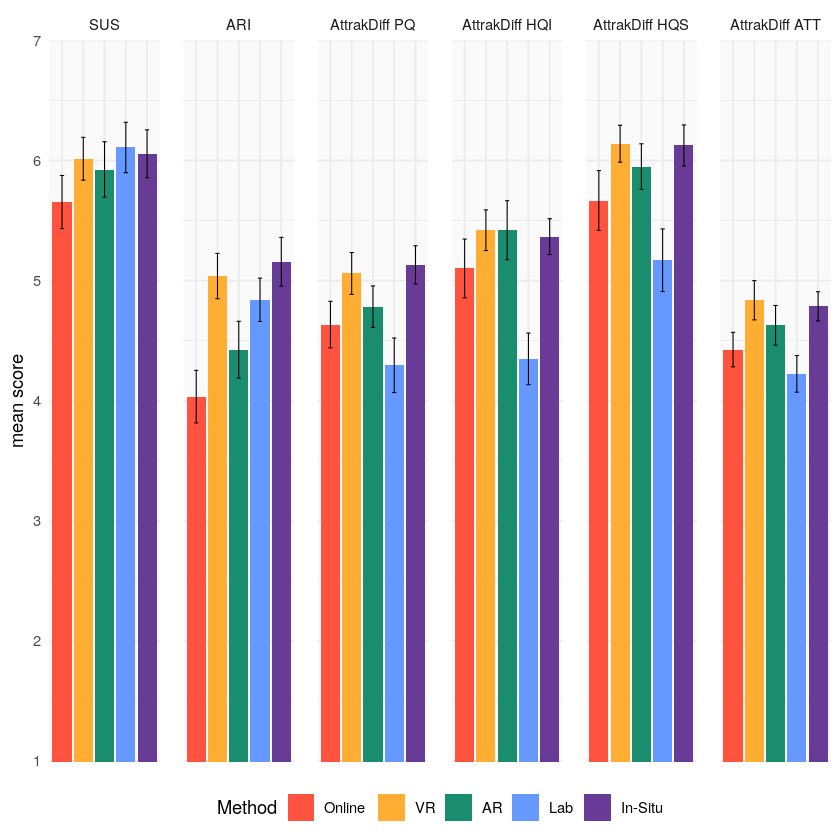

In [10]:
# function(x) c(mean = mean(x), sd = sd(x), se = sd(x)/sqrt(length(x)), ci = qt(0.95,df=length(x)-1)*sd(x)/sqrt(length(x))))
labels <- c("Method","Mean","SD","SE","CI")
meansSUS <- aggregate(c(data$SUS_Score), by=list(data$method), 
                   FUN=function(x) c(mean = mean(x), sd = sd(x), se = sd(x)/sqrt(length(x)), ci = qt(0.95,df=length(x)-1)*sd(x)/sqrt(length(x))))
meansSUS <- do.call(data.frame, meansSUS)
colnames(meansSUS) <- labels
meansSUS$Questionnaire <- "SUS"
                      
meansARI <- aggregate(c(data$ARI_Score), by=list(data$method), 
                   FUN=function(x) c(mean = mean(x), sd = sd(x), se = sd(x)/sqrt(length(x)), ci = qt(0.95,df=length(x)-1)*sd(x)/sqrt(length(x))))
meansARI <- do.call(data.frame, meansARI)
colnames(meansARI) <- labels
meansARI$Questionnaire <- "ARI"
                      
meansAD_PQ <- aggregate(c(data$AD_PQ), by=list(data$method), 
                   FUN=function(x) c(mean = mean(x), sd = sd(x), se = sd(x)/sqrt(length(x)), ci = qt(0.95,df=length(x)-1)*sd(x)/sqrt(length(x))))
meansAD_PQ <- do.call(data.frame, meansAD_PQ)
colnames(meansAD_PQ) <- labels
meansAD_PQ$Questionnaire <- "AD_PQ"
                        
meansAD_HQ <- aggregate(c(data$AD_HQ), by=list(data$method), 
                   FUN=function(x) c(mean = mean(x), sd = sd(x), se = sd(x)/sqrt(length(x)), ci = qt(0.95,df=length(x)-1)*sd(x)/sqrt(length(x))))
meansAD_HQ <- do.call(data.frame, meansAD_HQ)
colnames(meansAD_HQ) <- labels
meansAD_HQ$Questionnaire <- "AD_HQ"
                        
meansAD_ATT <- aggregate(c(data$AD_ATT), by=list( data$method), 
                   FUN=function(x) c(mean = mean(x), sd = sd(x), se = sd(x)/sqrt(length(x)), ci = qt(0.95,df=length(x)-1)*sd(x)/sqrt(length(x))))
meansAD_ATT <- do.call(data.frame, meansAD_ATT)
colnames(meansAD_ATT) <- labels
meansAD_ATT$Questionnaire <- "AD_ATT"
                         
meansAD_HQI <- aggregate(c(data$AD_HQI), by=list( data$method), 
                   FUN=function(x) c(mean = mean(x), sd = sd(x), se = sd(x)/sqrt(length(x)), ci = qt(0.95,df=length(x)-1)*sd(x)/sqrt(length(x))))
meansAD_HQI <- do.call(data.frame, meansAD_HQI)
colnames(meansAD_HQI) <- labels
meansAD_HQI$Questionnaire <- "AD_HQI"
                                     
meansAD_HQS <- aggregate(c(data$AD_HQS), by=list(data$method), 
                   FUN=function(x) c(mean = mean(x), sd = sd(x), se = sd(x)/sqrt(length(x)), ci = qt(0.95,df=length(x)-1)*sd(x)/sqrt(length(x))))
meansAD_HQS <- do.call(data.frame, meansAD_HQS)
colnames(meansAD_HQS) <- labels
meansAD_HQS$Questionnaire <- "AD_HQS"
                        
meansFINAL_01 <- aggregate(c(data$FINAL_01), by=list( data$method), 
                   FUN=function(x) c(mean = mean(x)+3, sd = sd(x), se = sd(x)/sqrt(length(x)), ci = qt(0.95,df=length(x)-1)*sd(x)/sqrt(length(x))))
meansFINAL_01 <- do.call(data.frame, meansFINAL_01)
colnames(meansFINAL_01) <- labels
meansFINAL_01$Questionnaire <- "FINAL_01"
                         
meansFINAL_02 <- aggregate(c(data$FINAL_02), by=list( data$method), 
                   FUN=function(x) c(mean = mean(x)+3, sd = sd(x), se = sd(x)/sqrt(length(x)), ci = qt(0.95,df=length(x)-1)*sd(x)/sqrt(length(x))))
meansFINAL_02 <- do.call(data.frame, meansFINAL_02)
colnames(meansFINAL_02) <- labels
meansFINAL_02$Questionnaire <- "FINAL_02"                                                      
                                                
means <- rbind(meansSUS,meansARI)
means <- rbind(meansAD_PQ,means)
#means <- rbind(meansAD_HQ,means)
means <- rbind(meansAD_HQI,means)
means <- rbind(meansAD_HQS,means)
means <- rbind(meansAD_ATT,means)
means                         
means$Method <- ordered(means$Method, levels = c('online','VR',  'AR', 'Lab', 'in-situ'))
means$Questionnaire <- as.factor(means$Questionnaire)
levels(means$Method) <- c("Online","VR","AR","Lab","In-Situ")
means$Questionnaire <- ordered(means$Questionnaire, levels = c( 'SUS', 'ARI',  'AD_PQ','AD_HQI','AD_HQS','AD_ATT' ))
levels(means$Questionnaire) <- c("SUS","ARI","AttrakDiff PQ","AttrakDiff HQI","AttrakDiff HQS","AttrakDiff ATT")                                               

                         ggplot(means, aes(x = Method,y = Mean, fill = Method)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.8), width=0.9) +
  geom_errorbar(aes(ymin=Mean-CI, ymax=Mean+CI, width=.1), position=position_dodge(0.8), width=0.2, size=0.3) +
  facet_wrap(~Questionnaire, ncol=6)+
  ylab("mean score")+
  scale_y_continuous(limits = c(0, 8), breaks=seq(1,7,1) ,expand = c(0,-1)) +
  scale_fill_manual(values = c("#FF523F","#FFAD33", "#198D6D","#6599FF", "#683b96")) +
  theme_minimal() +
  theme(
      legend.position = "bottom", #else bottom
      panel.background = element_rect( size=0.5, color="transparent", fill="gray98" ),
      axis.title.x=element_blank(),
      axis.text.x=element_blank(),
      panel.spacing = unit(0.5, "cm"),
      strip.placement = "outside",
  ) + ggsave("./out/plot.pdf", width=9, height=2.8, device=cairo_pdf)

In [11]:
write.csv(data,"./data/data_for_python.csv",row.names=FALSE)

In [12]:
data[,c(2,3,6,9:10)]
write.csv(data[,c(2,3,6,9:10)],"./data/data_ConditionQs.csv",row.names=FALSE)

,userID,method,condition,FINAL_03,FINAL_04
1,59702357039224,Lab,Plant,it would be very useful if you live a busy life and want to care for a plant,the artifact is still a prototype some improvement can be sending push notifications to phone bieng connected to a smart home and show some statistics and info for moisture
2,59702357039224,Lab,Cup,yes since sometime I wait for my coffee a bit too much and becomes cold and stale,i like the way it was presented and it is such a good idea
3,59702357039224,Lab,Mill,this could be useful for people who forget to buy groceries and would be a good reminder,my dislike is that i dont think alot of people will care for a machine that tellls them how much peppers they still have and use an outlet for it and make a clutter
4,59702357039224,Lab,Speaker,this artifact would help remind me if the noise is becoming noisy and disruptive to others,i would like more info and to be more connected to the phone
6,34282463854667,Lab,Cup,Think I dont ned it for my tea,Looks nice
7,34282463854667,Lab,Plant,My plants would be very happy,Looks unauffÃ¤llig and helps
8,34282463854667,Lab,Speaker,Notreally necessary for me,Could look nicer
9,34282463854667,Lab,Mill,I can see feel the filling of my mills,Looks nice
11,57027574993655,Lab,Speaker,Licht kÃ¶nnte stÃ¶ren abends,Gute Erkennbarkeit der LautstÃ¤rke auf Entfernung im Zimmer
12,57027574993655,Lab,Mill,Praktisch fÃ¼r die WG so sieht jeder dass etwas leer ist keine Diskussion du hast nicht bescheid gesgagt Beim Einkaufslistenerstellen praktisch da es direkt in den Blick fÃ¤llt,Licht an fester Station nicht direkt an den MÃ¼hlen So muss man bzw tut es aus Neugier immer auf die Station schauen


# Read Final Qs

In [13]:
dataF <- read.csv("./data/trials.csv", header=T, sep = ",", dec = ".")
userF <- read.csv("./data/users.csv", header=T, sep = ",", dec = ".")

userF$userID <- as.factor(userF$userID)

dataF <- dataF[dataF$condition==5,]

data_tmpF <- data.frame(str_split_fixed(as.character(dataF$values), ";", 5))
dfF <- data.frame(matrix(NA, nrow = nrow(dataF), ncol = 1))

for(i in names(data_tmpF)){
    df_tmpF <- data.frame(str_split_fixed(data_tmpF[,i], ":", 2)[,2])
    colnames(df_tmpF) <- c(str_split_fixed(data_tmpF[,i], ":", 2)[1,1])
    
    if(colnames(df_tmpF)=="FINAL_03"||colnames(df_tmpF)=="FINAL_04") {
        df_tmpF <- df_tmpF
    } else {
        df_tmpF <- as.data.frame(sapply(sapply(df_tmpF, as.character),as.numeric))
    }
    colnames(df_tmpF) <- c(str_split_fixed(data_tmpF[,i], ":", 2)[1,1])
    
    dfF <- cbind(dfF,df_tmpF)
}

dfF[,1] <- NULL
dataF[,7] <- NULL
dataF <- cbind(dataF, dfF)

dataF$userID <- as.factor(dataF$userID)


## Word Count Analyzes

In [14]:
dataF$FINAL_03_WC <- sapply(strsplit(as.character(dataF$FINAL_03), " "), length)
dataF$FINAL_04_WC <- sapply(strsplit(as.character(dataF$FINAL_04), " "), length)
dataF$WordCount <- dataF$FINAL_03_WC + dataF$FINAL_04_WC

data$FINAL_03_WC <- sapply(strsplit(as.character(data$FINAL_03), " "), length)
data$FINAL_04_WC <- sapply(strsplit(as.character(data$FINAL_04), " "), length)
data$WordCount <- data$FINAL_03_WC + data$FINAL_04_WC


dfWC1 <- dataF[,c("userID","method","FINAL_03_WC","FINAL_04_WC","WordCount")]
dfWC1$Condition <- "Final Questionnaire"
colnames(dfWC1) <- c("userID","Method","Word Count Q1","Word Count Q2","WordCount","Condition")

dfWC2 <- data[,c("userID","method","FINAL_03_WC","FINAL_04_WC","WordCount","condition")]
colnames(dfWC2) <- c("userID","Method","Word Count Q1","Word Count Q2","WordCount","Condition")

dfWC <- rbind(dfWC1,dfWC2)

dfWC$WordCount <- as.numeric(dfWC$WordCount)
dfWC$Method <- as.factor(dfWC$Method)
dfWC$Condition <- as.factor(dfWC$Condition)
dfWC$userID <- as.factor(dfWC$userID)

anova(art(WordCount ~ Method * Condition + (1|userID), data=dfWC))
pairwise.wilcox.test(dfWC$WordCount, dfWC$Method, p.adj = "bonf")


,Term,F,Df,Df.res,Pr(>F)
Method,Method,3.483613,4,55,0.01317661
Condition,Condition,0.958214,4,220,0.43133000
Method:Condition,Method:Condition,1.285009,16,220,0.20822015



	Pairwise comparisons using Wilcoxon rank sum test 

data:  dfWC$WordCount and dfWC$Method 

        AR     in-situ Lab     online 
in-situ 1.0000 -       -       -      
Lab     0.0388 1.0000  -       -      
online  0.0034 9.9e-05 1.1e-07 -      
VR      0.0515 1.0000  1.0000  8.3e-07

P value adjustment method: bonferroni 

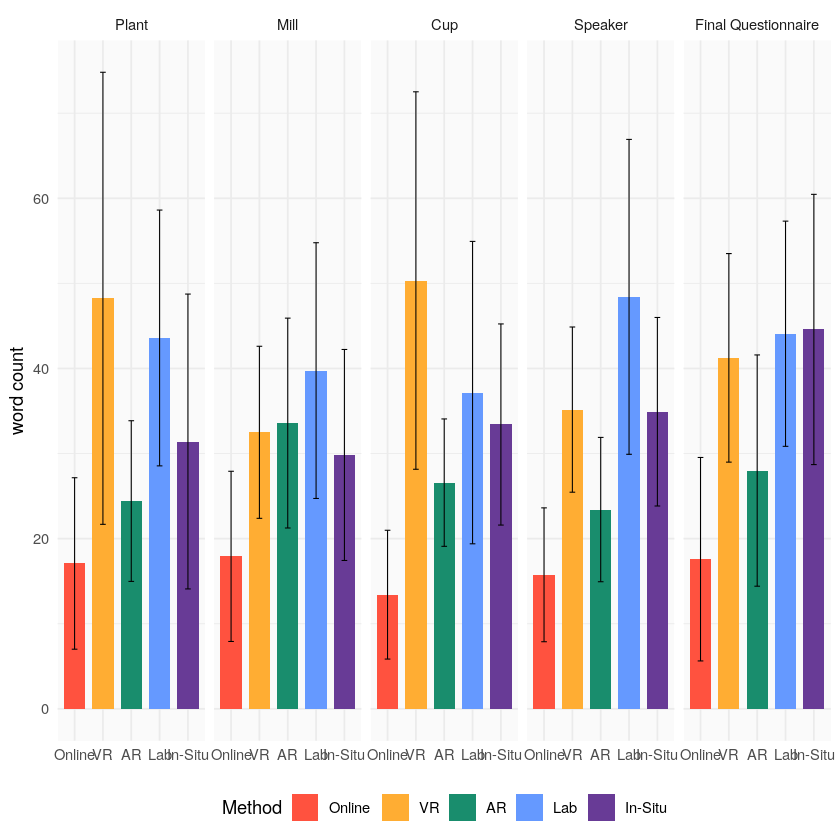

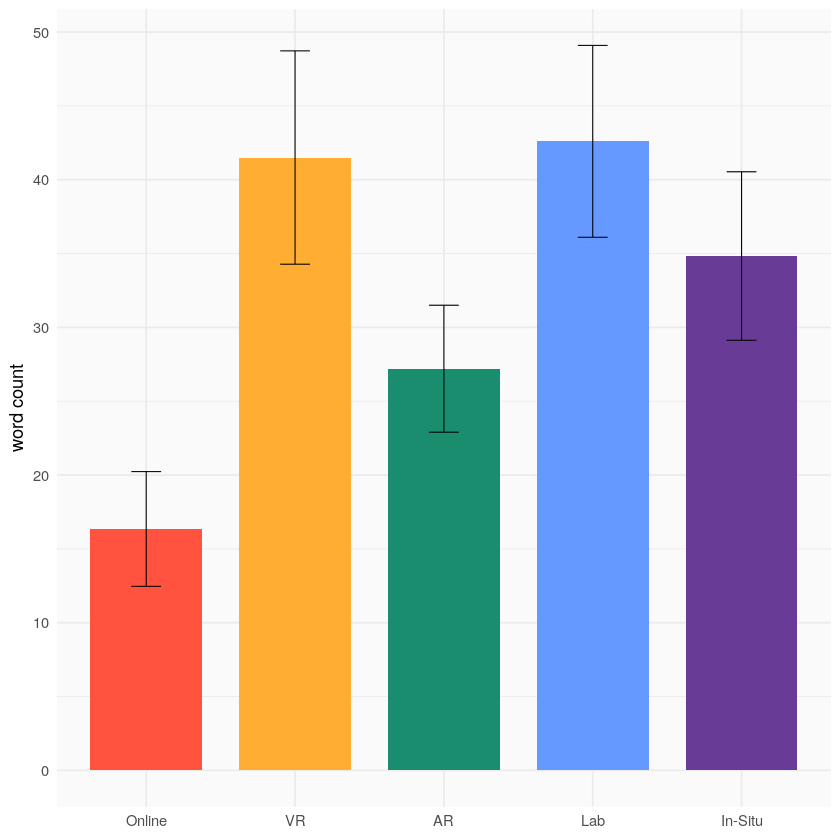

In [15]:
meansWC <- aggregate(c(dfWC$WordCount), by=list(dfWC$Method,dfWC$Condition), FUN=function(x) c(mean = mean(x)+3, sd = sd(x), se = sd(x)/sqrt(length(x)), ci = qt(0.95,df=length(x)-1)*sd(x)/sqrt(length(x))))
meansWC <- do.call(data.frame, meansWC)
colnames(meansWC) <- c("Method","Condition","Mean","SD","SE","CI")                
meansWC$Method <- ordered(meansWC$Method, levels = c('online','VR',  'AR', 'Lab', 'in-situ'))
levels(meansWC$Method) <- c("Online","VR","AR","Lab","In-Situ")    

meansWC$Condition <- ordered(meansWC$Condition, levels = c('Plant','Mill',  'Cup', 'Speaker', 'Final Questionnaire'))
              
ggplot(meansWC, aes(x = Method,y = Mean, fill = Method)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.8), width=0.75) +
  geom_errorbar(aes(ymin=Mean-CI, ymax=Mean+CI, width=.1), position=position_dodge(0.8), width=0.2, size=0.3) +
  facet_wrap(~Condition, ncol=5)+
  ylab("word count")+
  scale_fill_manual(values = c("#FF523F","#FFAD33", "#198D6D","#6599FF", "#683b96")) +
  theme_minimal() +
  theme(
    legend.position = "bottom", #else bottom
    panel.background = element_rect( size=0.5, color="transparent", fill="gray98" ),
      axis.title.x=element_blank(),
    strip.placement = "outside",
  ) + ggsave("./out/plot_wordcount.pdf", width=9, height=2.2, device=cairo_pdf)
                     
meansWC <- aggregate(c(dfWC$WordCount), by=list(dfWC$Method), FUN=function(x) c(mean = mean(x)+3, sd = sd(x), se = sd(x)/sqrt(length(x)), ci = qt(0.95,df=length(x)-1)*sd(x)/sqrt(length(x))))
meansWC <- do.call(data.frame, meansWC)
colnames(meansWC) <- c("Method","Mean","SD","SE","CI")
#meansWC                
meansWC$Method <- ordered(meansWC$Method, levels = c('online','VR',  'AR', 'Lab', 'in-situ'))
levels(meansWC$Method) <- c("Online","VR","AR","Lab","In-Situ")    
        
ggplot(meansWC, aes(x = Method,y = Mean, fill = Method)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.8), width=0.75) +
  geom_errorbar(aes(ymin=Mean-CI, ymax=Mean+CI, width=.1), position=position_dodge(0.8), width=0.2, size=0.3) +
  ylab("word count")+
  scale_fill_manual(values = c("#FF523F","#FFAD33", "#198D6D","#6599FF", "#683b96")) +
  theme_minimal() +
  theme(
    legend.position = "none", #else bottom,
    panel.background = element_rect( size=0.5, color="transparent", fill="gray98" ),
      axis.title.x=element_blank(),
    strip.placement = "outside",
  ) + ggsave("./out/plot_wordcount_new.pdf", width=4, height=2.2, device=cairo_pdf)

## Qualitative Analysis

In [16]:
dataX <- dataF[dataF$condition==5,]
dataX <- dataX[c("ID","userID","method","condition","FINAL_01","FINAL_02","FINAL_03","FINAL_04")]
write.csv(dataX,"./data/data_finalQs.csv", row.names=FALSE)
dataX

,ID,userID,method,condition,FINAL_01,FINAL_02,FINAL_03,FINAL_04
5,5,59702357039224,Lab,5,1,-1,anything from a stove that is ready to use or a spoon stating the temperature of ur food,i found that all artifacts are well organized and in place because of the sensors it would help with focusing on other activities drawbacks sometimes a person can even disregard light and might need more than that
10,10,34282463854667,Lab,5,3,2,,No drawbacks advantages eg for handicapped people advntages for me and my plants
15,15,57027574993655,Lab,5,3,1,Blumenopf MÃ¼hlen,Erleichtern das zusammenleben stellen eine ErinnerungsmÃ¶glichkeit dar Sollten gut verknÃ¼pft mit restlichem Smart Home sein
20,20,18025464968638,Lab,5,3,-3,Reminder of my cooking timers in my living room,Helps with things that nobody wants to bother with eg thinking about watering plants!
25,25,45803049942478,Lab,5,3,1,An ambient display that would show if a room of the shared house is free or busy and since how much time as I was leaving in an Airbnb,I really like the fact that the information is provided on the initial device
30,30,49077228105686,Lab,5,0,-1,dishesclothes Washing machine status Fridge content for a shopping list the status of the food poison alert child safety window is opened or child awake not in the room medication in the area eg keep away from kids sign The countdown for events hosted in my place,the typical concern of privacy if its published somewhere if its local then there is no issues depending on electricity could make them unusable otherwise enhance not change the nature of the artifacts i would like to have them more invisible or part of the object not an additional part
35,35,50474400760253,Lab,5,1,-2,Switching the lights onoff,Lack of seamless integration
40,40,81815864920848,Lab,5,2,-2,Plates at the kitchen notifications for physical activities notifications for each system which states are changing over time as heat level of consumption etc,Notification itself could be distractive so it should have flexible adjustment settings
45,45,96038764984296,AR,5,0,0,Onoff hotcold oven dish washerwashing machine ready filter of air condition has to be changed door lockedunlocked,I dont want to lose the direct contactfeeling withfor some artifacts
50,50,72020225965604,AR,5,3,3,Temperature heater,I dont want all objects to glow all the time Rather they should inform me if action is required


## Questionnaire Completion Time

In [17]:
dfQQ_times <- melt(data[,c(2,3,6,70:73)], id.vars=c("userID", "method", "condition"))

dfFQ_times <- melt(dataF[dataF$condition==5,c(2,3,6,11)], id.vars=c("userID", "method", "condition"))
levels(dfQQ_times$variable) <- c("SUS","AttrakDiff","ARI","Artifact Feedback")
dfFQ_times$condition <- "Final Condition"
dfFQ_times$variable <- "Final Feedback"
dfQQ_times <- rbind(dfQQ_times,dfFQ_times)

dfQQ_times$value <- dfQQ_times$value / 1000 / 60

meansTimes <- aggregate(c(dfQQ_times$value), by=list(dfQQ_times$userID, dfQQ_times$method, dfQQ_times$variable), FUN=sum)

meansTimes <- do.call(data.frame, meansTimes)
colnames(meansTimes) <- c("userID", "Method", "Questionnaire", "Time")                 

summary(aov(Time ~ Method, meansTimes))
                        
pairwise.t.test(dfQQ_times$value, dfQQ_times$method, adjust="Bonferroni")       

             Df Sum Sq Mean Sq F value Pr(>F)  
Method        4  133.1   33.28   3.142 0.0149 *
Residuals   295 3124.5   10.59                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


	Pairwise comparisons using t tests with pooled SD 

data:  dfQQ_times$value and dfQQ_times$method 

        AR      in-situ Lab    online
in-situ 0.1627  -       -      -     
Lab     5.4e-06 0.0333  -      -     
online  0.0017  0.3718  0.3950 -     
VR      0.2002  0.8753  0.0231 0.3602

P value adjustment method: holm 

Method,Mean,SD,SE,CI
AR,4.443561,2.090158,0.2698382,0.4509248
In-Situ,5.309200,3.088689,0.3987480,0.6663450
Lab,6.415902,3.426363,0.4423416,0.7391939
Online,5.911502,4.503711,0.5814266,0.9716179
VR,5.247809,2.650553,0.3421849,0.5718228


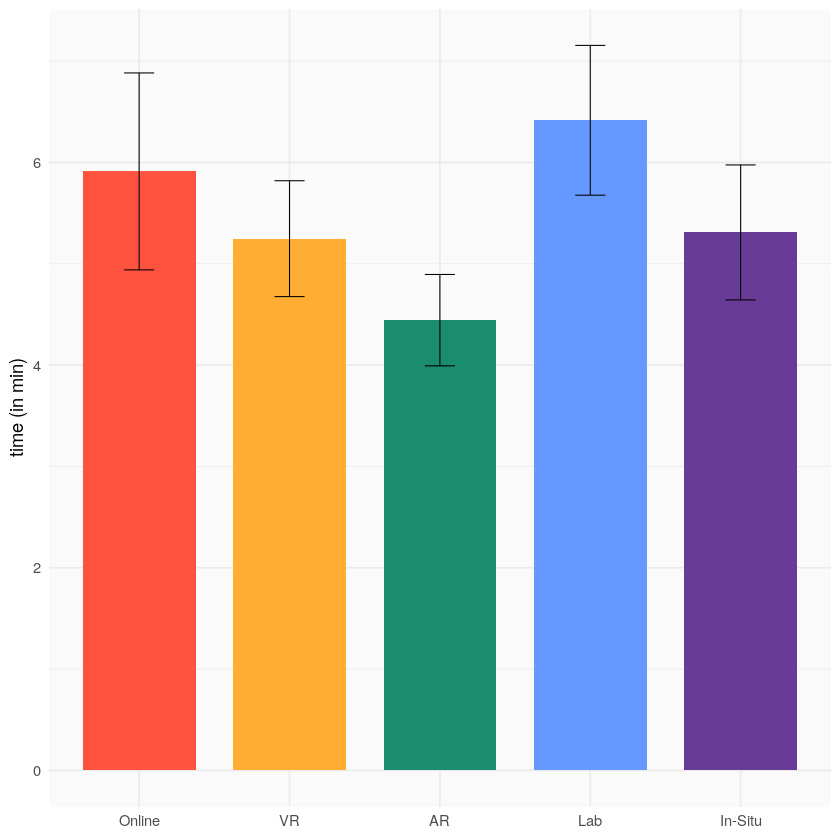

In [18]:
meansTimes <- aggregate(c(meansTimes$Time), by=list(meansTimes$Method), FUN=function(x) c(mean = mean(x), sd = sd(x), se = sd(x)/sqrt(length(x)), ci = qt(0.95,df=length(x)-1)*sd(x)/sqrt(length(x))))
meansTimes <- do.call(data.frame, meansTimes)
                       
                        
colnames(meansTimes) <- c("Method","Mean","SD","SE","CI")       
meansTimes$Method <- ordered(meansTimes$Method, levels = c('online','VR',  'AR', 'Lab', 'in-situ'))
levels(meansTimes$Method) <- c("Online","VR","AR","Lab","In-Situ") 
head(meansTimes)    
                        
ggplot(meansTimes, aes(x = Method,y = Mean, fill = Method)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.8), width=0.75) +
  geom_errorbar(aes(ymin=Mean-CI, ymax=Mean+CI, width=.1), position=position_dodge(0.8), width=0.2, size=0.3) +
  ylab("time (in min)")+
  scale_fill_manual(values = c("#FF523F","#FFAD33", "#198D6D","#6599FF", "#683b96")) +
  theme_minimal() +
  theme(
    legend.position = "none", #else bottom,
    panel.background = element_rect( size=0.5, color="transparent", fill="gray98" ),
      axis.title.x=element_blank(),
    strip.placement = "outside",
  ) + ggsave("./out/plot_times.pdf", width=4, height=2.2, device=cairo_pdf)

##  Item Reliability Cronbach’s α

In [21]:
cronbachAlphaDF <- alpha(data[,11:69], check.keys=TRUE)

cronbachAlphaLabDF <- alpha(data[which(data$method == "Lab"),11:69], check.keys=TRUE)
cronbachAlphaOnlineDF <- alpha(data[which(data$method == "online"),11:69], check.keys=TRUE)
cronbachAlphaVRDF <- alpha(data[which(data$method == "VR"),11:69], check.keys=TRUE)
cronbachAlphaARDF <- alpha(data[which(data$method == "AR"),11:69], check.keys=TRUE)
cronbachAlphaInSituDF <- alpha(data[which(data$method == "in-situ"),11:69], check.keys=TRUE)

Warning message in cor.smooth(r):
“Matrix was not positive definite, smoothing was done”Warning message in alpha(data[, 11:69], check.keys = TRUE):
“Some items were negatively correlated with total scale and were automatically reversed.
 This is indicated by a negative sign for the variable name.”In smc, the correlation matrix was not invertible, smc's returned as 1s
Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning messag

In [22]:
cronbachAlphaDF$total

,raw_alpha,std.alpha,G6(smc),average_r,S/N,ase,mean,sd,median_r
,0.9380003,0.938666,1,0.2059666,15.30418,0.005627729,1.254661,0.6863847,0.1861762


,names,raw.r,ItemCorrelation,ID
ARI_02,ARI_02,0.6737985,All,1
ATTRAKDIFF_19,ATTRAKDIFF_19,0.6691618,All,2
ARI_04,ARI_04,0.6681584,All,3
ATTRAKDIFF_03,ATTRAKDIFF_03,0.6346982,All,4
ATTRAKDIFF_26,ATTRAKDIFF_26,0.6307723,All,5
ARI_10,ARI_10,0.6096353,All,6


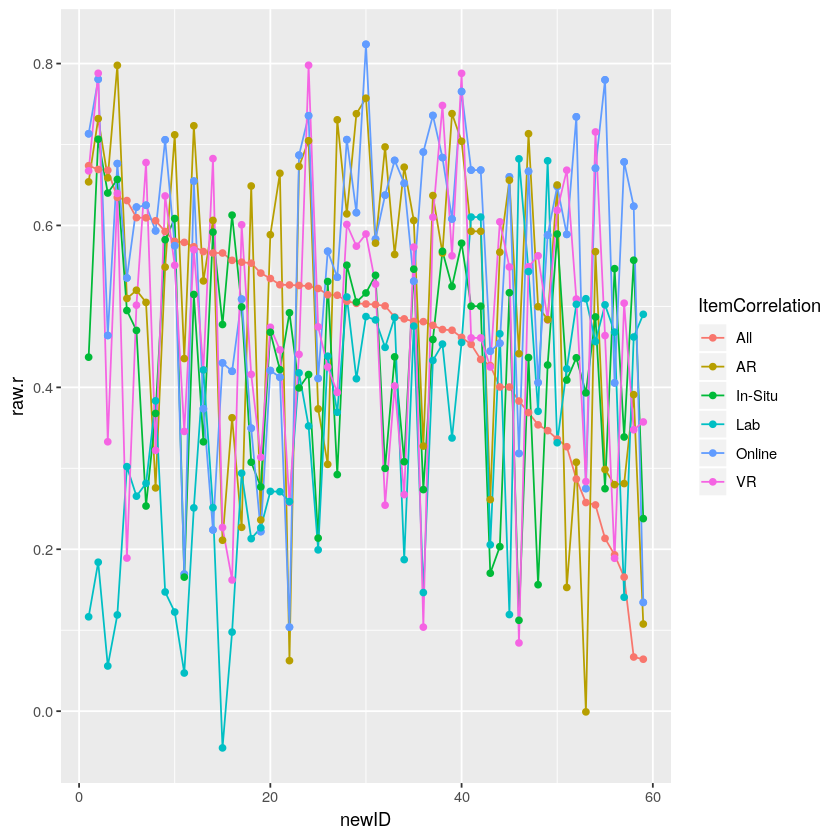

In [23]:
cronbachAlpha <- cronbachAlphaDF$item.stats
cronbachAlpha <- cronbachAlpha[order(-cronbachAlpha$raw.r),]
cronbachAlpha <- data.frame(cronbachAlpha[2])
cronbachAlpha$ItemCorrelation <- "All"
cronbachAlpha$ID <- seq.int(nrow(cronbachAlpha))

cronbachAlphaLab <- cronbachAlphaLabDF$item.stats
cronbachAlphaLab <- cronbachAlphaLab[2]
cronbachAlphaLab$ItemCorrelation <- "Lab"
cronbachAlphaLab$ID <- seq.int(nrow(cronbachAlphaLab))

cronbachAlphaOnline <- cronbachAlphaOnlineDF$item.stats
cronbachAlphaOnline <- cronbachAlphaOnline[2]
cronbachAlphaOnline$ItemCorrelation <- "Online"
cronbachAlphaOnline$ID <- seq.int(nrow(cronbachAlphaOnline))

cronbachAlphaVR <- cronbachAlphaVRDF$item.stats
cronbachAlphaVR <- cronbachAlphaVR[2]
cronbachAlphaVR$ItemCorrelation <- "VR"
cronbachAlphaVR$ID <- seq.int(nrow(cronbachAlphaVR))

cronbachAlphaAR <- cronbachAlphaARDF$item.stats
cronbachAlphaAR <- cronbachAlphaAR[2]
cronbachAlphaAR$ItemCorrelation <- "AR"
cronbachAlphaAR$ID <- seq.int(nrow(cronbachAlphaAR))

cronbachAlphaInSitu <- cronbachAlphaInSituDF$item.stats
cronbachAlphaInSitu <- cronbachAlphaInSitu[2]
cronbachAlphaInSitu$ItemCorrelation <- "In-Situ"
cronbachAlphaInSitu$ID <- seq.int(nrow(cronbachAlphaInSitu))

cronbachAlpha <- rbind(cronbachAlpha,rbind(cronbachAlphaOnline,rbind(cronbachAlphaOnline, rbind(cronbachAlphaVR, rbind(cronbachAlphaAR, rbind(cronbachAlphaInSitu, cronbachAlphaLab))))))
cronbachAlpha <- cbind(names = rownames(cronbachAlpha), cronbachAlpha)
head(cronbachAlpha)
cronbachAlpha$newID <- seq(1,59)
ggplot(data=cronbachAlpha, aes(x=newID, y=raw.r, group=ItemCorrelation, color=ItemCorrelation)) +
  geom_line() +
  geom_point()

In [24]:
levels(data$method)
options(warn=-1)
cbDF <- alpha(data[,11:69], check.keys=TRUE)
cbDF <- data.frame( cbDF$total)
cbDF$Method <- "All"
cbDF$Questionnaire <- "AllQs"

head(cbDF)

for ( i in levels(data$method) ) {  
  cbDF_a <- alpha(data[data$method==i, 11:31], check.keys=TRUE)
  cbDF_tmp <- data.frame( cbDF_a$total)
  cbDF_tmp$Method <- i
  cbDF_tmp$Questionnaire <- "ARI"
  cbDF <- rbind(cbDF, cbDF_tmp)
    
  cbDF <- rbind(cbDF, cbDF_tmp)
  cbDF_a <- alpha(data[, 11:31], check.keys=TRUE)
  cbDF_tmp <- data.frame( cbDF_a$total)
  cbDF_tmp$Method <- "All"
  cbDF_tmp$Questionnaire <- "ARI"
  cbDF <- rbind(cbDF, cbDF_tmp)
    
  cbDF_a <- alpha(data[data$method==i,32:37], check.keys=TRUE)
  cbDF_tmp <- data.frame( cbDF_a$total)
  cbDF_tmp$Method <- i
  cbDF_tmp$Questionnaire <- "AD_PQ"
  cbDF <- rbind(cbDF, cbDF_tmp)
    
  cbDF <- rbind(cbDF, cbDF_tmp)
  cbDF_a <- alpha(data[, 32:37], check.keys=TRUE)
  cbDF_tmp <- data.frame( cbDF_a$total)
  cbDF_tmp$Method <- "All"
  cbDF_tmp$Questionnaire <- "AD_PQ"
  cbDF <- rbind(cbDF, cbDF_tmp)
    
  cbDF_a <- alpha(data[data$method==i,38:44], check.keys=TRUE)
  cbDF_tmp <- data.frame( cbDF_a$total)
  cbDF_tmp$Method <- i
  cbDF_tmp$Questionnaire <- "AD_HQI"
  cbDF <- rbind(cbDF, cbDF_tmp)
    
  cbDF <- rbind(cbDF, cbDF_tmp)
  cbDF_a <- alpha(data[, 38:44], check.keys=TRUE)
  cbDF_tmp <- data.frame( cbDF_a$total)
  cbDF_tmp$Method <- "All"
  cbDF_tmp$Questionnaire <- "AD_HQI"
  cbDF <- rbind(cbDF, cbDF_tmp)
    
  cbDF_a <- alpha(data[data$method==i,45:51], check.keys=TRUE)
  cbDF_tmp <- data.frame( cbDF_a$total)
  cbDF_tmp$Method <- i
  cbDF_tmp$Questionnaire <- "AD_HQS"
  cbDF <- rbind(cbDF, cbDF_tmp)
    
  cbDF <- rbind(cbDF, cbDF_tmp)
  cbDF_a <- alpha(data[, 45:51], check.keys=TRUE)
  cbDF_tmp <- data.frame( cbDF_a$total)
  cbDF_tmp$Method <- "All"
  cbDF_tmp$Questionnaire <- "AD_HQS"
  cbDF <- rbind(cbDF, cbDF_tmp)
    
  cbDF_a <- alpha(data[data$method==i,52:58], check.keys=TRUE)
  cbDF_tmp <- data.frame( cbDF_a$total)
  cbDF_tmp$Method <- i
  cbDF_tmp$Questionnaire <- "AD_ATT"
  cbDF <- rbind(cbDF, cbDF_tmp)
    
  cbDF <- rbind(cbDF, cbDF_tmp)
  cbDF_a <- alpha(data[,52:58], check.keys=TRUE)
  cbDF_tmp <- data.frame( cbDF_a$total)
  cbDF_tmp$Method <- "All"
  cbDF_tmp$Questionnaire <- "AD_ATT"
  cbDF <- rbind(cbDF, cbDF_tmp)
    
    
  cbDF_a <- alpha(data[data$method==i,59:69], check.keys=TRUE)
  cbDF_tmp <- data.frame( cbDF_a$total)
  cbDF_tmp$Method <- i
  cbDF_tmp$Questionnaire <- "SUS"
  cbDF <- rbind(cbDF, cbDF_tmp)
    
  cbDF <- rbind(cbDF, cbDF_tmp)
  cbDF_a <- alpha(data[,59:69], check.keys=TRUE)
  cbDF_tmp <- data.frame( cbDF_a$total)
  cbDF_tmp$Method <- "All"
  cbDF_tmp$Questionnaire <- "SUS"
  cbDF <- rbind(cbDF, cbDF_tmp)
}
options(warn=0)

cbDF <- cbDF[,c("Method","Questionnaire","raw_alpha")]
#cbDF <- cbDF$QuestionnairecbDF$Questionnaire
data_wide <- dcast(cbDF, Method ~ Questionnaire, value.var="raw_alpha", fun.aggregate = mean, 
  na.rm = TRUE)
#data_wide$Method <- ordered(data_wide$Method, levels = c('online','VR',  'AR', 'Lab', 'in-situ'))
data_wide$AllQs <- NULL
round_df(data_wide,3)

[1] "AR"      "in-situ" "Lab"     "online"  "VR"

In smc, the correlation matrix was not invertible, smc's returned as 1s
In smc, the correlation matrix was not invertible, smc's returned as 1s
In smc, the correlation matrix was not invertible, smc's returned as 1s
In smc, the correlation matrix was not invertible, smc's returned as 1s
In smc, the correlation matrix was not invertible, smc's returned as 1s
In smc, the correlation matrix was not invertible, smc's returned as 1s
In smc, the correlation matrix was not invertible, smc's returned as 1s
In smc, the correlation matrix was not invertible, smc's returned as 1s
In smc, the correlation matrix was not invertible, smc's returned as 1s
In smc, the correlation matrix was not invertible, smc's returned as 1s
In smc, the correlation matrix was not invertible, smc's returned as 1s
In smc, the correlation matrix was not invertible, smc's returned as 1s
In smc, the correlation matrix was not invertible, smc's returned as 1s
In smc, the correlation matrix was not invertible, smc's returne

raw_alpha,std.alpha,G6.smc.,average_r,S.N,ase,mean,sd,median_r,Method,Questionnaire
0.9380003,0.938666,1,0.2059666,15.30418,0.005627729,1.254661,0.6863847,0.1861762,All,AllQs


Method,AD_ATT,AD_HQI,AD_HQS,AD_PQ,ARI,SUS
All,0.698,0.794,0.814,0.559,0.911,0.806
AR,0.718,0.860,0.829,0.512,0.909,0.854
in-situ,0.513,0.700,0.790,0.540,0.911,0.786
Lab,0.648,0.617,0.726,0.483,0.861,0.811
online,0.734,0.846,0.870,0.668,0.892,0.833
VR,0.703,0.747,0.813,0.616,0.895,0.758
